 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [ ]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline



# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [5]:
# Reading whale returns
csvpath1= Path("Resources/whale_returns.csv")

In [6]:
wh_rtrn_df=pd.read_csv(csvpath1 ,index_col ="Date" ,infer_datetime_format=True, parse_dates =True)
wh_rtrn_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [7]:
# Count nulls
wh_rtrn_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Drop nulls
wh_rtrn_df.dropna(inplace=True)
wh_rtrn_df



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [11]:
# Reading algorithmic returns
csvpath2= Path("Resources/algo_returns.csv")
algo_df=pd.read_csv(csvpath2 ,index_col ="Date" ,infer_datetime_format=True, parse_dates =True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [12]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P TSX 60 Closing Prices
csvpath3=Path("Resources/sp_tsx_history.csv")
sp500_history= pd.read_csv(csvpath3,index_col ="Date" ,infer_datetime_format=True, parse_dates =True)
sp500_history

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [15]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [16]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"] = sp500_history["Close"].str.replace(",", "")
sp500_history["Close"] = sp500_history["Close"].astype("float")

In [17]:
sp500_history.dtypes

Close    float64
dtype: object

In [18]:
#convert the S&P TSX 60 closing prices to daily returns.

In [19]:
sp500 = sp500_history.pct_change() 
sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [20]:
# Drop nulls
sp500.dropna(inplace=True)
sp500

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [21]:
# Rename `Close` Column to be specific to this portfolio.
sp500.rename(columns={"Close" :"S&P TSX"}, inplace=True)
sp500.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns_1=pd.concat([wh_rtrn_df,algo_df,sp500], axis="columns" , join= "inner")
daily_returns_1

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

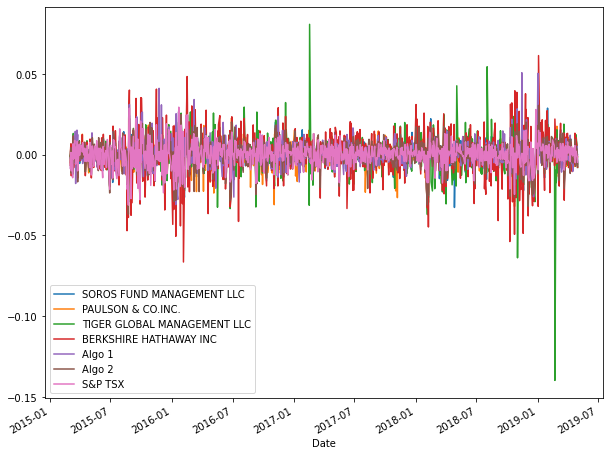

In [23]:
# Plot daily returns of all portfolios
daily_returns_1.plot(figsize=(10,8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of portfolios over the Last 5 Years'}, xlabel='Date'>

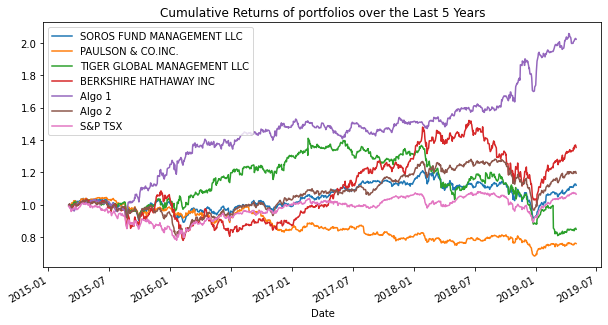

In [24]:
# Calculate cumulative returns of all portfolios
cumulative_returns_1=(1 + daily_returns_1).cumprod() *1
cumulative_returns_1

# Plot cumulative returns
cumulative_returns_1.plot(figsize=(10,5), title="Cumulative Returns of portfolios over the Last 5 Years")


In [25]:
#Does any portfolio outperform the S&P TSX 60?
# YES Algo 1, as we see the performance of algo 1 over the 5 years acoording to the cumlitave plot chart  

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'daily_retruns of all portfolio'}>

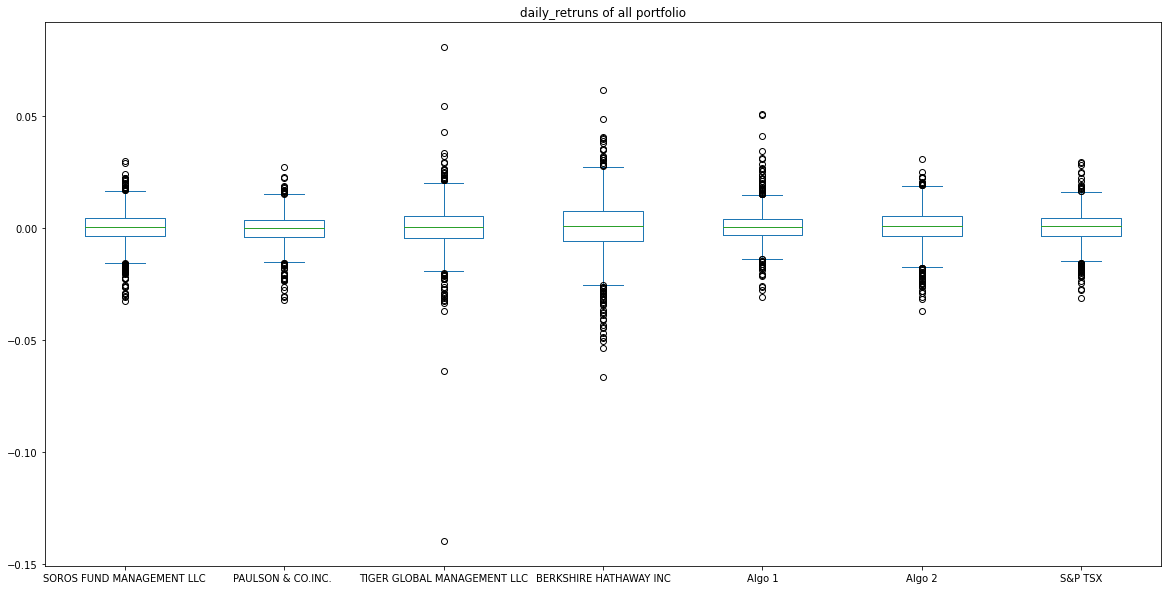

In [26]:
# Box plot to visually show risk
daily_returns_1.plot.box(figsize=(20, 10), title="daily_retruns of all portfolio")

### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
daily_returns_1_std = daily_returns_1.std()
daily_returns_1_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [28]:
# Calculate  the daily standard deviation of S&P TSX 60
print(daily_returns_1["S&P TSX"].std())
# Determine which portfolios are riskier than the S&P TSX 60
daily_returns_1_std > daily_returns_1["S&P TSX"].std()

0.007034167748577725


SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [29]:
np.sqrt(daily_returns_1.var() * 252) # or ** 0.5 instead of np.sqrt()

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

In [30]:
# Calculate the annualized standard deviation (252 trading days)
daily_returns_1_std_annual = daily_returns_1.std() * np.sqrt(252)
daily_returns_1_std_annual

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

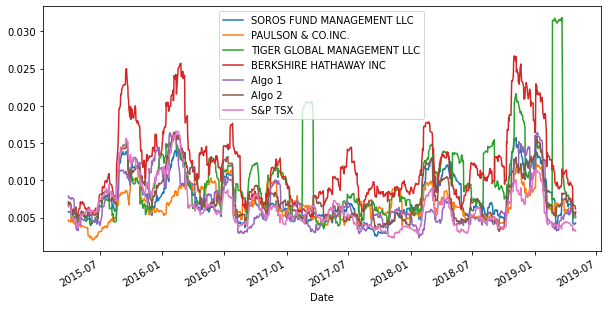

In [31]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
daily_returns_1.rolling(window= 21).std().plot(figsize=(10,5))

### Calculate and plot the correlation

In [32]:
# Calculate the correlation
correlation = daily_returns_1.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

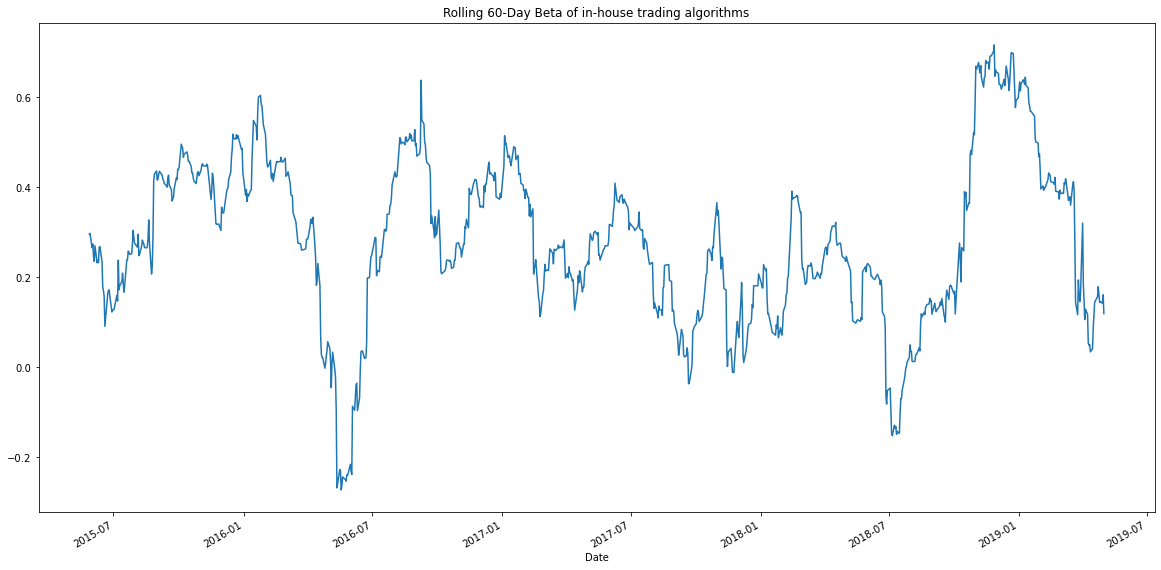

In [33]:
# Calculate covariance of a single portfolio

rolling_algo_covariance = daily_returns_1["Algo 1"].rolling(window=60).cov(daily_returns_1["S&P TSX"])

# Calculate variance of S&P TSX

rolling_variance = daily_returns_1["S&P TSX"].rolling(window= 60).var()

# Computing beta


rolling_algo_beta= rolling_algo_covariance/rolling_variance

# Plot beta trend


blah= rolling_algo_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of in-house trading algorithms")







## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Rolling 21 Beta of in-house trading algorithms'}, xlabel='Date'>

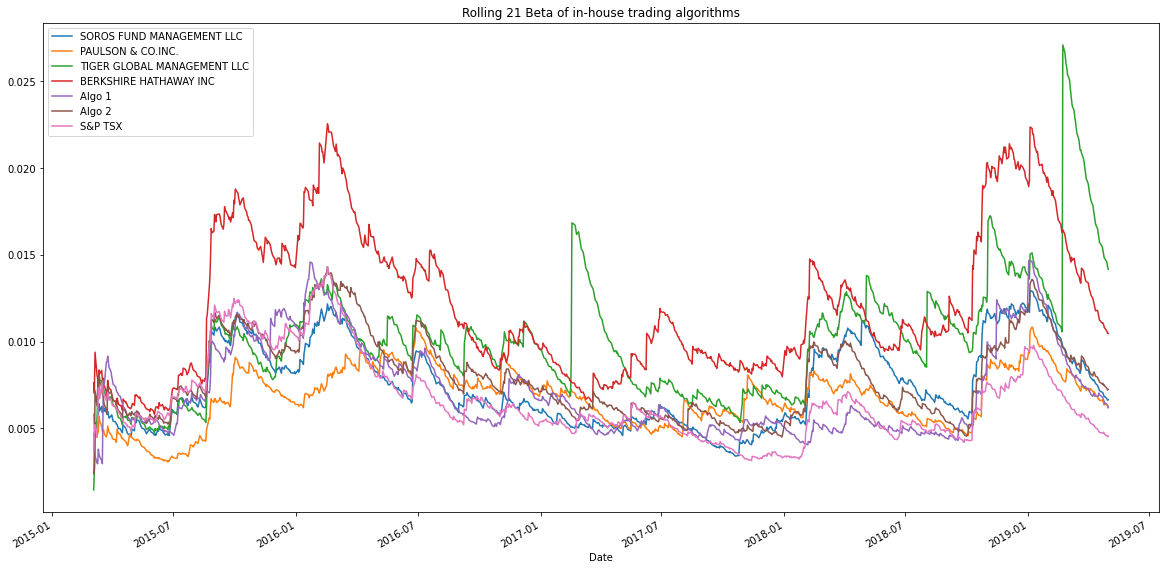

In [34]:
# Use `ewm` to calculate the rolling window
#times=['2015-03-03' : '2015-03-24']
daily_returns_1.ewm(halflife=21).std().plot(figsize=(20, 10), title="Rolling 21 Beta of in-house trading algorithms")




---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
sharpe_ratios = (daily_returns_1.mean() * 252) / (daily_returns_1.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

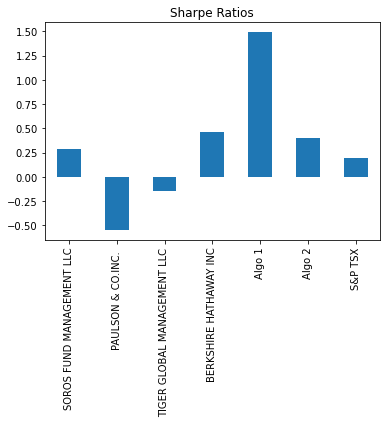

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind= "bar", title= "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Reading data from 1st stock
csvpath_1= Path("Resources/S&P TSX 60.csv")
SP_TSX_df= pd.read_csv(csvpath_1 ,index_col ="Date" ,infer_datetime_format=True, parse_dates =True)
SP_TSX_df.head()


,Close
Date,
2019-02-12,232.37
2019-02-13,227.53
2019-02-14,234.39
2019-02-15,236.05
2019-02-19,239.75


In [38]:
# Reading data from 2nd stock
csvpath_2= Path ("Resources/fb_google_finance.csv")
fb_gg_df=pd.read_csv(csvpath_2 ,index_col ="Date" ,infer_datetime_format=True, parse_dates =True)
fb_gg_df.head()

,Close
Date,
2019-02-12,165.04
2019-02-13,164.07
2019-02-14,163.95
2019-02-15,162.50
2019-02-19,162.29


In [39]:
# Reading data from 3rd stock
csvpath_3= Path ("Resources/NYSE_DIS_finance.csv")
nys_ds_df= pd.read_csv(csvpath_3 ,index_col ="Date" ,infer_datetime_format=True, parse_dates =True)
nys_ds_df.head()

,Close
Date,
2019-02-12,109.20
2019-02-13,110.20
2019-02-14,110.66
2019-02-15,112.59
2019-02-19,113.51


In [40]:
# Combine all stocks in a single DataFrame
combined_df=pd.concat([fb_gg_df,nys_ds_df, SP_TSX_df], axis="columns", join="inner" )

combined_df.head()

,Close,Close,Close
Date,,,
2019-02-12,165.04,109.20,232.37
2019-02-13,164.07,110.20,227.53
2019-02-14,163.95,110.66,234.39
2019-02-15,162.50,112.59,236.05
2019-02-19,162.29,113.51,239.75


In [41]:
# Reorganize portfolio data by having a column per symbol
combined_df= combined_df.sort_index()
combined_df.columns= [ "Fb_google", "NYSE_DIS", "SP 60"]
combined_df.head(10)

,Fb_google,NYSE_DIS,SP 60
Date,,,
2019-02-12,165.04,109.20,232.37
2019-02-13,164.07,110.20,227.53
2019-02-14,163.95,110.66,234.39
2019-02-15,162.50,112.59,236.05
2019-02-19,162.29,113.51,239.75
2019-02-20,162.56,113.68,236.35
2019-02-21,160.04,114.29,236.16
2019-02-22,161.89,115.25,241.47
2019-02-25,164.62,113.59,247.73


In [42]:
# Calculate daily returns
daily_returns_2= combined_df.pct_change ()
daily_returns_2= daily_returns_2.sort_index()

# Drop NAs
daily_returns_2=daily_returns_2.dropna()

# Display sample data
daily_returns_2.tail(10)

,Fb_google,NYSE_DIS,SP 60
Date,,,
2020-04-30,0.054174,-0.036526,-0.006348
2020-05-01,-0.011919,-0.024503,-0.022248
2020-05-04,0.014782,-0.021991,0.076256
2020-05-05,0.008818,-0.020547,0.041218
2020-05-06,0.006761,-0.001781,0.069444
2020-05-07,0.013383,0.046491,-0.017507
2020-05-08,0.005160,0.034006,-0.026813
2020-05-11,0.003909,-0.012734,0.061634
2020-05-12,-0.014448,-0.029786,0.003400


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [43]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns_2= daily_returns_2.dot(weights)
# Display sample data
portfolio_returns_2.head()

Date
2019-02-13   -0.005850
2019-02-14    0.011198
2019-02-15    0.005226
2019-02-19    0.007518
2019-02-20   -0.003673
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
# Join your returns DataFrame to the original returns DataFrame
all_returns=pd.concat([daily_returns_1, daily_returns_2] , axis= "columns", join="inner")
all_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Fb_google,NYSE_DIS,SP 60
Date,,,,,,,,,,
2019-02-13,0.000000,0.000000,0.000000,0.000000,0.000058,0.001786,-0.000983,-0.005877,0.009158,-0.020829
2019-02-14,0.002795,0.001987,-0.004381,-0.003987,0.002285,-0.002618,0.004432,-0.000731,0.004174,0.030150
2019-02-15,0.006410,0.007684,0.010389,0.005964,-0.001310,0.009946,0.009063,-0.008844,0.017441,0.007082
2019-02-19,0.003437,0.000896,0.002877,0.005298,0.001755,0.006377,0.006263,-0.001292,0.008171,0.015675
2019-02-20,0.003650,-0.001690,0.005369,0.003833,-0.000007,0.001218,0.005886,0.001664,0.001498,-0.014181
2019-02-21,-0.001401,-0.004180,-0.001717,-0.006760,-0.000166,-0.000914,-0.001895,-0.015502,0.005366,-0.000804
2019-02-22,0.001011,0.004447,-0.139820,0.022029,0.002395,0.008799,0.000759,0.011560,0.008400,0.022485
2019-02-25,-0.002242,-0.003639,-0.009525,0.005358,0.009834,-0.000968,0.002749,0.016863,-0.014403,0.025925
2019-02-26,-0.006030,-0.006118,-0.017294,-0.001617,0.005112,-0.002075,0.000678,-0.002977,-0.000792,-0.014492


In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Fb_google,NYSE_DIS,SP 60
Date,,,,,,,,,,
2019-02-13,0.000000,0.000000,0.000000,0.000000,0.000058,0.001786,-0.000983,-0.005877,0.009158,-0.020829
2019-02-14,0.002795,0.001987,-0.004381,-0.003987,0.002285,-0.002618,0.004432,-0.000731,0.004174,0.030150
2019-02-15,0.006410,0.007684,0.010389,0.005964,-0.001310,0.009946,0.009063,-0.008844,0.017441,0.007082
2019-02-19,0.003437,0.000896,0.002877,0.005298,0.001755,0.006377,0.006263,-0.001292,0.008171,0.015675
2019-02-20,0.003650,-0.001690,0.005369,0.003833,-0.000007,0.001218,0.005886,0.001664,0.001498,-0.014181


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized `std`
daily_returns_2_annual = daily_returns_2.std() * np.sqrt(252)
daily_returns_2_annual

Fb_google    0.369433
NYSE_DIS     0.394216
SP 60        0.574918
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

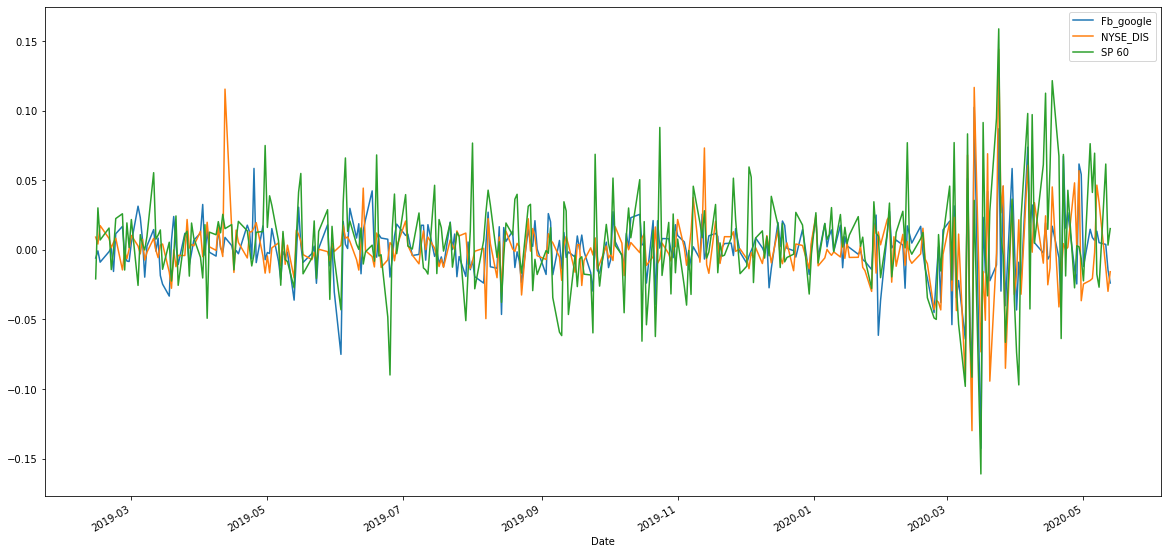

In [47]:
# Calculate rolling standard deviation
daily_returns_2.rolling(window= 21).std()

# Plot rolling standard deviation
daily_returns_2.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

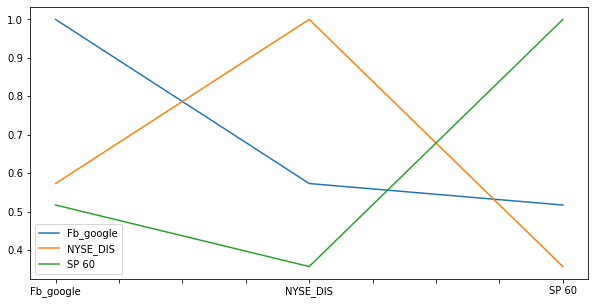

In [48]:
# Calculate and plot the correlation
correlation = daily_returns_2.corr()
correlation.plot(figsize=(10,5))

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

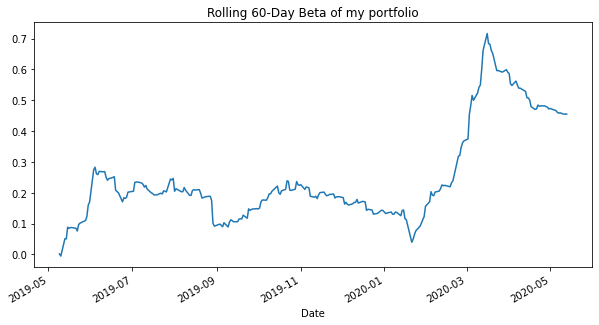

In [49]:
# Calculate and plot Beta
rolling_daily_returns_2_covariance = daily_returns_2["Fb_google"].rolling(window=60).cov(daily_returns_2["SP 60"])

#rolling variance of daily_returns_1["S&P TSX"] already has been calcualted above
rolling_variance_2= daily_returns_2["SP 60"].rolling(window=60).var()


rolling_daily_returns_2_beta = rolling_daily_returns_2_covariance/ rolling_variance_2


blah=rolling_daily_returns_2_beta.plot(figsize=(10,5), title="Rolling 60-Day Beta of my portfolio")
#legend= (["daily_returns_2", "S&P TSX"])



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_2 = (daily_returns_2.mean() * 252) / (daily_returns_2.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe_Ratios'}>

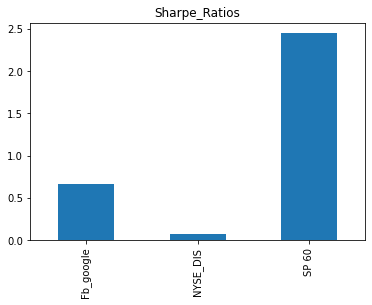

In [53]:
#Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind="bar", title="Sharpe_Ratios")

### How does your portfolio do?

Write your answer here!

In [55]:
# Averaging sharpe ratios
my_sharpe_ratios_avg= sharpe_ratios_2.mean()
harold_sharp_ratio_avg = sharpe_ratios.mean()

print("my sharp ratios average:", my_sharpe_ratios_avg)
print("Harold's sharpe ratio average:",harold_sharp_ratio_avg )

my sharp ratios average: 1.0624802224925582
Harold's sharpe ratio average: 0.30651230842900634


In [56]:
# Determine if Harold's average is greater
harold_sharp_ratio_avg > my_sharpe_ratios_avg


False